# Part 1 Derivate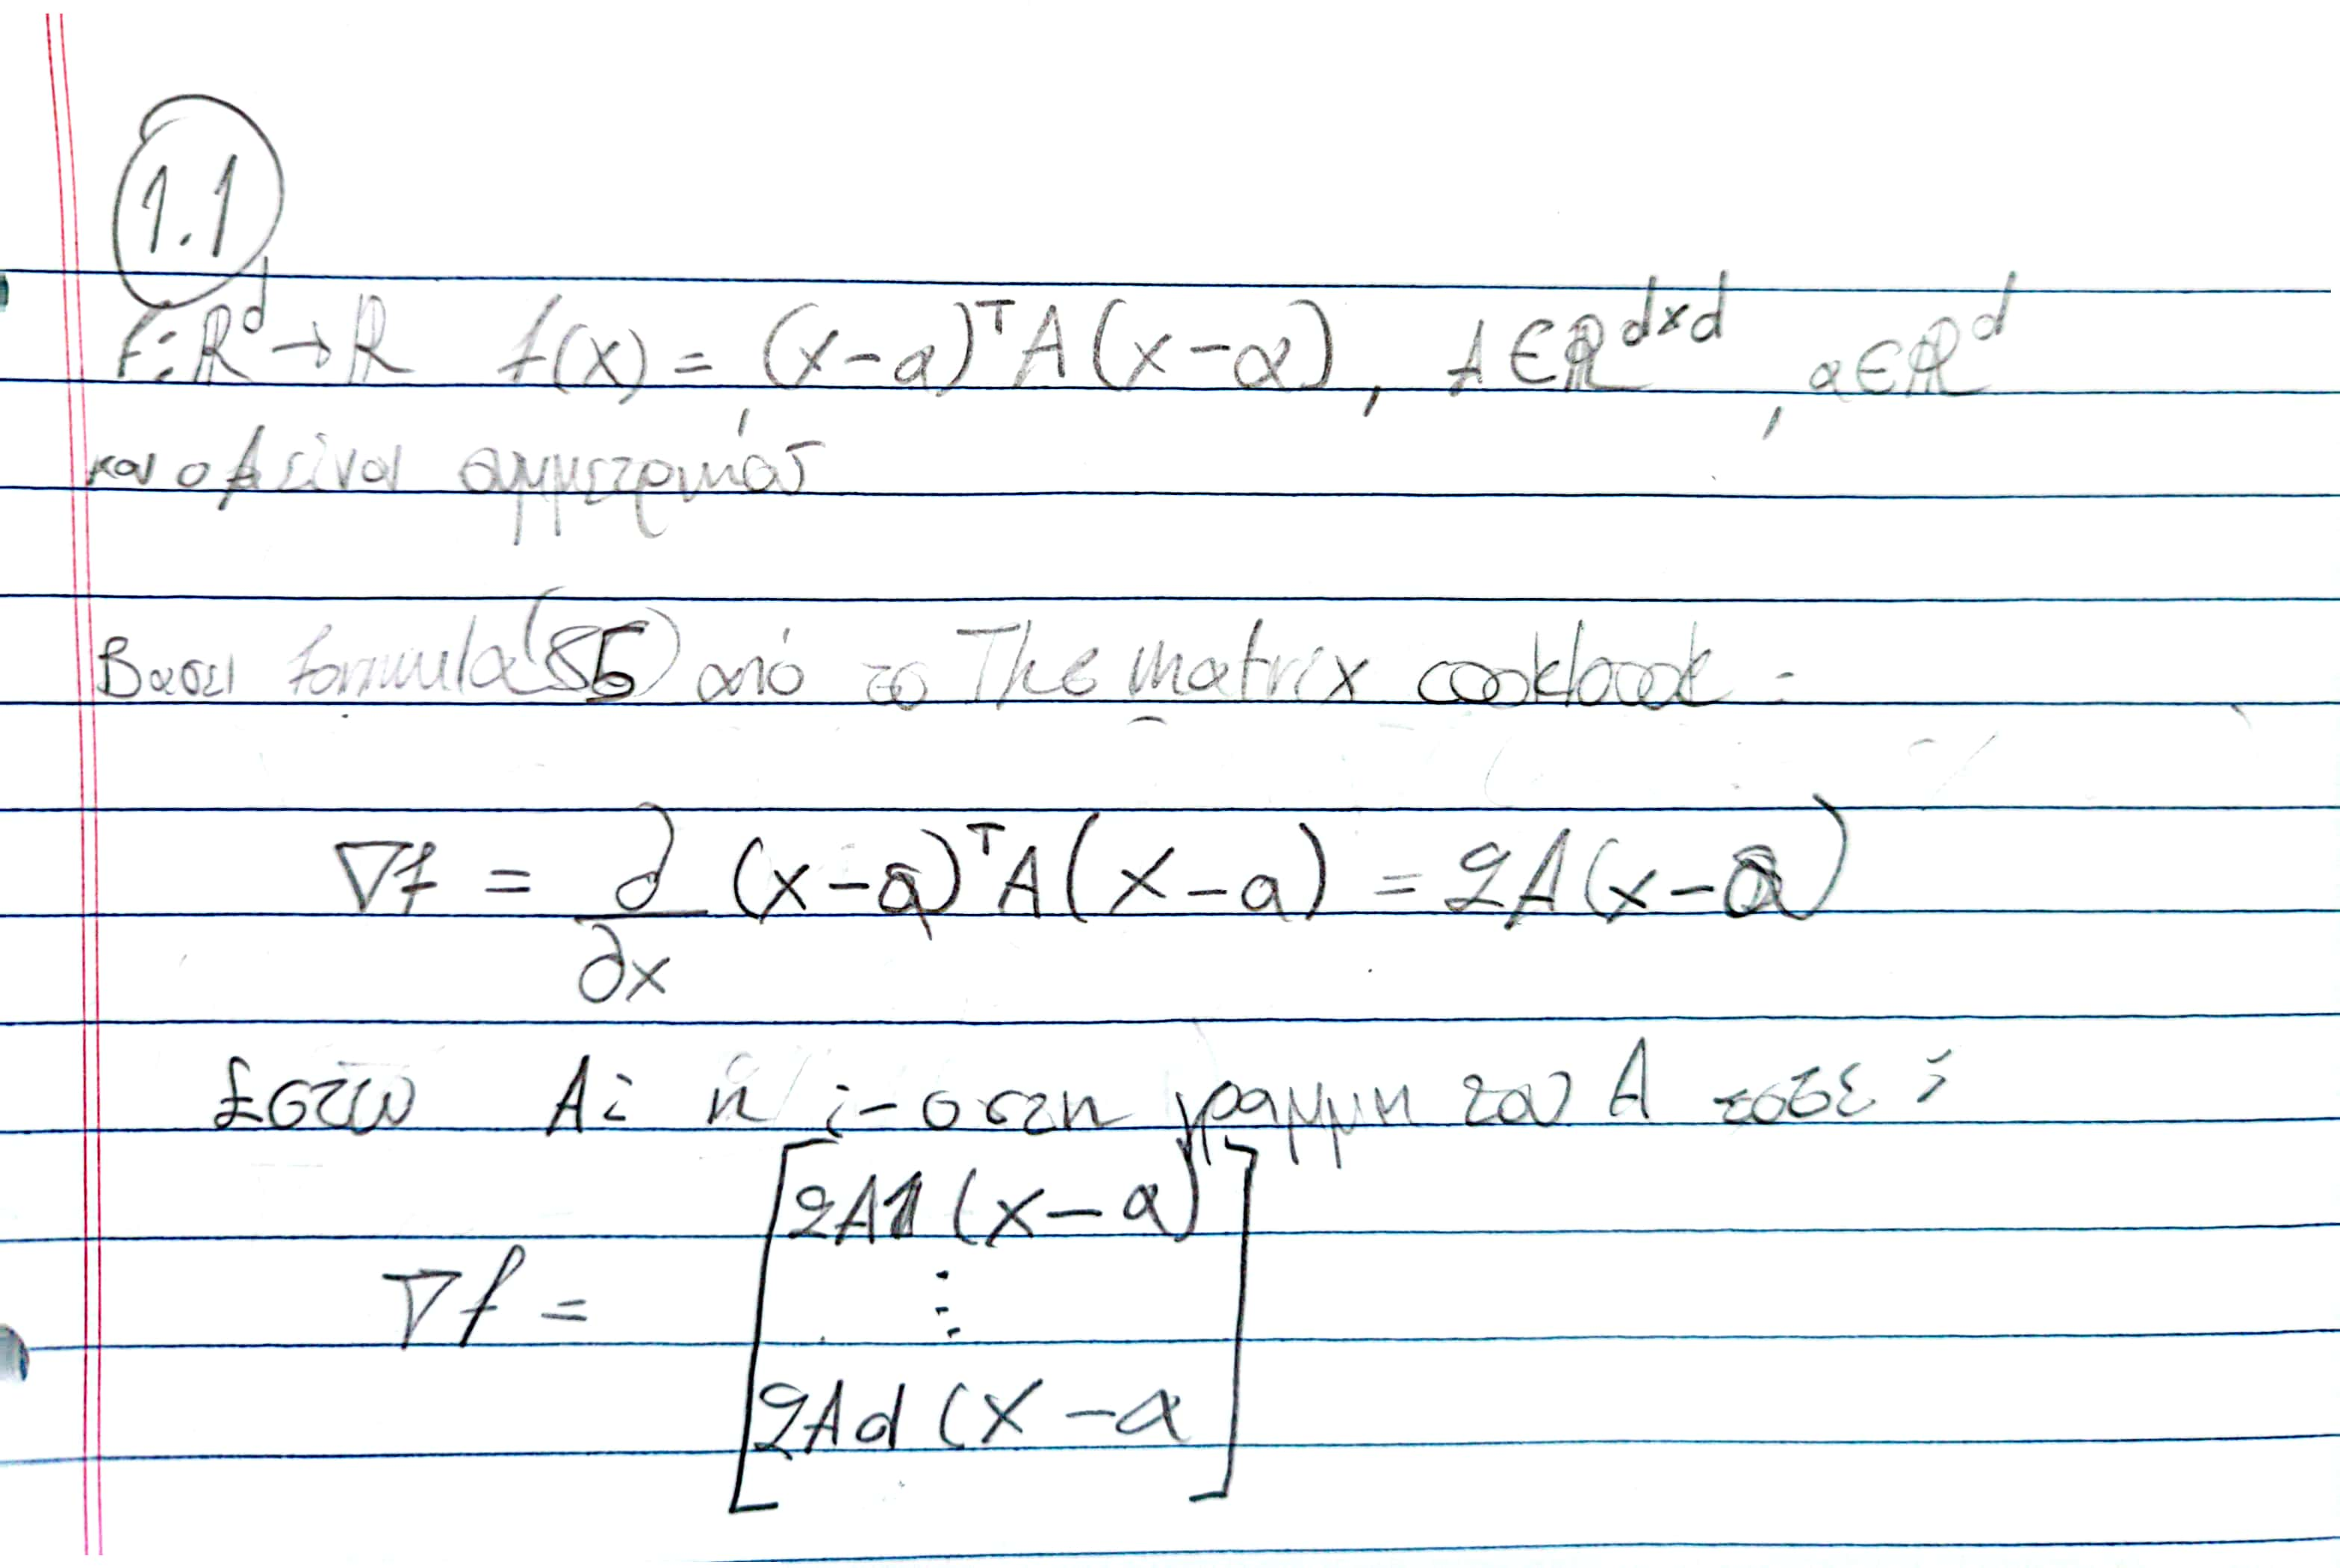

#Διευκρινήσεις

Για το Part 2 μπορείτε να τρέξετε τα διαφορετικά υποερωτήματα κάνοντας uncomment τα σχετικά κομμάτια κώδικα, και comment out όλα τα υπόλοιπα υποερωτήματα

#Part 2 Gradient Descent

In [20]:
#imports
import numpy as np
import matplotlib.pyplot as plt

###Function 1

In [21]:
#data
data1 = np.array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])
data1[1,:]

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

Function:

$f_1(x;w) = \frac{1}{1 + e^{-(w_{0} + w_{1}*x_{i})}}$

BCE loss function:

$-\frac{1}{Ν} \sum_{i=1}^{N}(y_{i}\log_2(f_1(x;w))+(1-{y}_{i})\log_2(1-f_1(x;w))$

Partial Derivatives of loss function:

$\frac{dy}{dw_{0}} =-\frac{1}{N}\sum_{i=1}^{N} y_i\frac{e^{-(w_0 + w_1x_i)}}{ln2(1 + e^{-(w_0 + w_1x_i)})} - (1-y_{i})\frac{e^{-(w_0 + w_1x)}}{(1 + e^{-(w_0 + w_1x_i)})^2}\frac{1}{ln2(1-\frac{1}{1 + e^{-(w_{0} + w_{1}*x_{i})}})}$



$\frac{dy}{dw_{1}} =-\frac{1}{N}\sum_{i=1}^{N} y_i\frac{xe^{-(w_0 + w_1x_i)}}{ln2(1 + e^{-(w_0 + w_1x_i)})} - (1-y_{i})\frac{xe^{-(w_0 + w_1x)}}{(1 + e^{-(w_0 + w_1x_i)})^2}\frac{1}{ln2(1-\frac{1}{1 + e^{-(w_{0} + w_{1}*x_{i})}})}$




In [22]:

def gradient_descent(x, y, iterations = 150, learning_rate = 0.001, question21=False,question22=False):

    n = float(len(x)) #num of samples
    w1 = 0.0 #init, rundom num
    w0 = 1.0 #init, random num
    f1 = lambda x , w0 , w1: 1/(1 + np.exp(-w1 * x - w0))
    f1_dw0 = lambda x, w0, w1: np.exp(-w0-w1*x)/(1+np.exp(-w0-w1*x))**2
    f1_dw1 = lambda x, w0, w1: np.exp(-w0-w1*x)*x/(1+np.exp(-w0-w1*x))**2
    bce_loss = lambda n, y, y_predicted: -1/n*sum(y*np.log2(y_predicted)+(1-y)*np.log2(1-y_predicted))
    loss_history = []
    for i in range(iterations):
        y_predicted = f1(x,w0,w1)
        # Calculating the gradients of MSE function
        loss_history.append(bce_loss(n,y,y_predicted))
        w0_derivative = -(1/n)*sum(y*f1_dw0(x,w0,w1)/np.log(2)*y_predicted + (1-y)*f1_dw0(x,w0,w1)/np.log(2)*(1-y_predicted))
        w1_derivative = -(1/n)*sum(y*f1_dw1(x,w0,w1)/np.log(2)*y_predicted + (1-y)*f1_dw1(x,w0,w1)/np.log(2)*(1-y_predicted))

        # Updating weights and bias
        if question21 == True:
          if 0 < i < 100:
              learning_rate = 0.001
          if 100 < i < 140:
              learning_rate = 0.0005
          if 140 < i < 150:
              learning_rate = 0.0001
        elif question22 == True:
          learing_rate = learning_rate - 0.000001
        w1 = w1 - (learning_rate * w1_derivative)
        w0 = w0 - (learning_rate * w0_derivative)

        # Printing the parameters for each 1000th iteration
        #print(f"Iteration {i+1}: Weight  {w1}, Bias {w0}")

    return w1, w0, loss_history
X = data1[0]
Y = data1[1]

#Question 2.1

# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias, loss_history = gradient_descent(X, Y)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Making predictions using estimated parameters
f1 = lambda x , weight, bias: 1/(1 + np.exp(-(weight * x + bias)))
Y_pred = f1(X,estimated_weight, estimated_bias)

#Question 2.1 learning_rate = 10e-04

# # Estimating weight and bias using gradient descent
# estimated_weight, estimated_bias, loss_history = gradient_descent(X, Y,150,0.0001)
# print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# # Making predictions using estimated parameters
# f1 = lambda x , weight, bias: 1/(1 + np.exp(-(weight * x + bias)))
# Y_pred = f1(X,estimated_weight, estimated_bias)

# #Question 2.2.1

# # Estimating weight and bias using gradient descent
# estimated_weight, estimated_bias, loss_history = gradient_descent(X, Y,150,0.001,True,False)
# print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# # Making predictions using estimated parameters
# f1 = lambda x , weight, bias: 1/(1 + np.exp(-(weight * x + bias)))
# Y_pred = f1(X,estimated_weight, estimated_bias)



# Question 2.2.2

# #Estimating weight and bias using gradient descent
# estimated_weight, estimated_bias, loss_history = gradient_descent(X, Y,150,0.001,False,True)
# print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# # Making predictions using estimated parameters
# f1 = lambda x , weight, bias: 1/(1 + np.exp(-(weight * x + bias)))
# Y_pred = f1(X,estimated_weight, estimated_bias)

Estimated Weight: 0.060309588592965986
Estimated Bias: 1.0219311383442322


Plotting BCE Loss

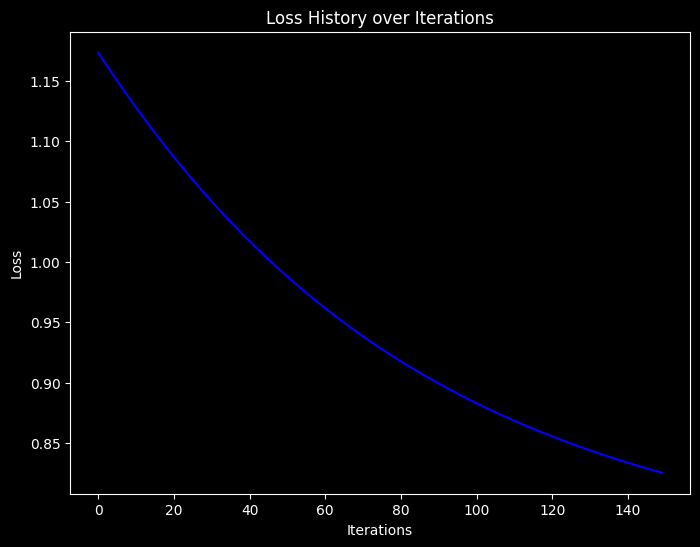

In [23]:
# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(loss_history, color='blue',markerfacecolor='red',
          markersize=10)

# Label the axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Add a title
plt.title('Loss History over Iterations')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Model(Blue) and Data(Red)')

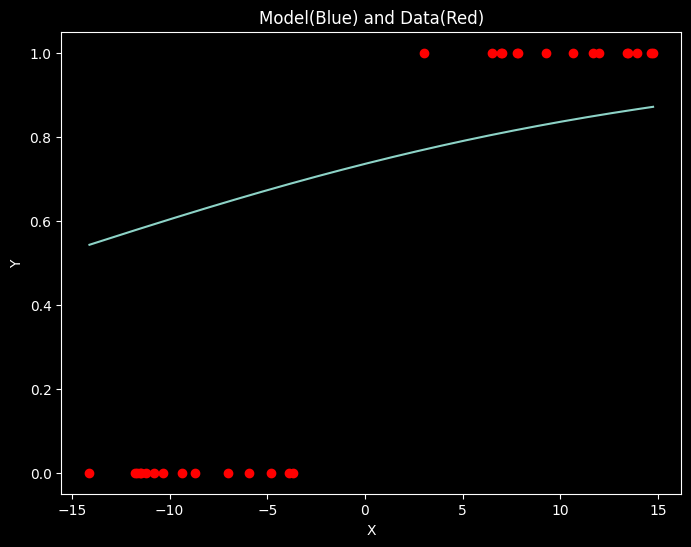

In [24]:
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
# Create a plot
x_values = np.linspace(np.min(X),np.max(X), 400)
y_values = f1(x_values,estimated_weight,estimated_bias)
plt.plot(x_values, y_values)



# Label the axes
plt.xlabel('X')
plt.ylabel('Y')

# Add a title
plt.title('Model(Blue) and Data(Red)')

2.1 Σχόλια:

Από το διάγραμμα σφάλματος παρατηρούμε ότι το σφάλμα μειώνεται καθώς αυξάνονται οι επαναλήψεις. Αυτό συμβαίνει καθώς η μέθοδος συγκλίνει.

Απο διάγραμμα των δεδομένων και της τελικής συνάρτησης παρατηρούμε ότι η συνάρτηση λειτουργεί ως ένας γραμμικός των δεδομένων μας, παρ'όλα αυτά δεν μπορεί να τα προσεγγίσει.

Αλλάζοντας τον σε ρυθμό εκμάθησης $10^{-4}$ παρατηρούμε ότι ο ρυθμός μείωσης του σφάλματος αυξάνεται (γραμμική μείωση), αλλά η σύγκλιση επιτυγχάνεται πιο αργά για τις ίδιες επαναλήψεις

2.2 Σχόλια:

Και στις δύο περιπτώσεις το αποτέλεσμα προσομοιάζει την σύγκλιση για ρυθμό εκμάθησης $10^{-3}$, δεν παρατηρείται ιδιαίτερη διαφορά, πράγμα λογικό εφόσον χρησιμοποιείται ως επι το πλείστον ο ίδιος ρυθμός εκμάθησης.

### Function 2

In [25]:
#data
data2 = np.array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+00,
         1.33554857e+01,  8.29901089e-01,  6.98676486e+00,
         1.09374219e+01,  1.10267454e+01, -3.73579147e-01,
         8.46227301e-01,  2.54038774e-02,  1.07569223e+01]])
data2

array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+

Function:

$f_2(x;w) = w_0 + w_1 \sigma(w_2+w_3x)$

where  $\sigma:\mathbb{R}\to\mathbb{R}$ is:
$$
	\sigma(x)=\begin{cases} x, & x>0 \\ 0, & x\le 0 \end{cases}
$$

MSE loss function:

$\frac{1}{n} \sum_{i=1}^n \big( y_i - f_1(x_i;w) \big)^2$

Partial Derivatives of loss function:

$\frac{dy}{dw_{0}}$ = 1

$\frac{dy}{dw_{1}} = \sigma(w_2 + w_3x)$

$\frac{dy}{dw_{2}} = \begin{cases} w_1, & w_1+w_3*x>0 \\ 0, & w_1+w_3*x\le 0 \end{cases}$

$\frac{dy}{dw_{3}} = \begin{cases} w_1x, & w_1+w_3*x>0 \\ 0, & w_1+w_3*x\le 0 \end{cases}$


In [26]:

def gradient_descent(x, y, iterations = 150, learning_rate = 0.001, question21=False, question22=False):

    n = float(len(x)) #num of samples
    w1 = 0.5 #init, rundom num
    w0 = 1.0 #init, random num
    w2 = 2.2
    w3 = 3.4
    s = np.vectorize(lambda x: x if x > 0 else 0)
    f2 = lambda x , w0 , w1, w2, w3: w0 + w1*s(w2 + w3*x)
    f2_dw0 = 1
    f2_dw1 = lambda x, w2, w3: s(w2+w3*x)
    f2_dw2 = np.vectorize(lambda x, w1, w2, w3: w1 if (w2 + w3*x) > 0 else 0)
    f2_dw3 = np.vectorize(lambda x, w1, w2, w3: w1*x if (w2 + w3*x) > 0 else 0)
    mse_loss = lambda n, y, y_predicted: -1/n*(np.sum(y - y_predicted))**2
    loss_history = []
    for i in range(iterations):
        y_predicted = f2(x,w0,w1,w2,w3)
        # Calculating the gradients of MSE function
        loss_history.append(mse_loss(n,y,y_predicted))
        w0_derivative = -(2/n) * sum(f2_dw0*(y-y_predicted))
        w1_derivative = -(2/n) * sum(f2_dw1(x,w2,w3)*(y-y_predicted))
        w2_derivative = -(2/n) * sum(f2_dw2(x,w1,w2,w3)*(y-y_predicted))
        w3_derivative = -(2/n) * sum(f2_dw3(x,w1,w2,w3)*(y-y_predicted))

        # Updating weights and bias
        if question21 == True:
            if 0 < i < 100:
                learning_rate = 0.001
            if 100 < i < 140:
                learning_rate = 0.0005
            if 140 < i < 150:
                learning_rate = 0.0001
        elif question22 == True:
          learing_rate = learning_rate - 0.000001
        w0 = w0 - (learning_rate * w0_derivative)
        w1 = w1 - (learning_rate * w1_derivative)
        w2 = w2 - (learning_rate * w2_derivative)
        w3 = w3 - (learning_rate * w3_derivative)


        # Printing the parameters for each 1000th iteration
        #print(f"Iteration {i+1}: Weight  {w1}, Bias {w0}")

    return w0, w1, w2, w3, loss_history
X = data2[0]
Y = data2[1]

#Question 2.1

# Estimating weight and bias using gradient descent
w0, w1, w2, w3, loss_history = gradient_descent(X, Y)
print(f"Estimated Weight3: {w3}\nEstimated Weight2: {w2}\nEstimated Weight1: {w1}\nEstimated Weight0: {w0}")

# Making predictions using estimated parameters
s = np.vectorize(lambda x: x if x > 0 else 0)
f2 = lambda x , w0 , w1, w2, w3: w0 + w1*s(w2 + w3*x)
Y_pred = f2(X,w0,w1,w2,w3)

#Question 2.1 learning rate = 10e-04

# # Estimating weight and bias using gradient descent
# w0, w1, w2, w3, loss_history = gradient_descent(X, Y,150 ,0.0001)
# print(f"Estimated Weight3: {w3}\nEstimated Weight2: {w2}\nEstimated Weight1: {w1}\nEstimated Weight0: {w0}")

# # Making predictions using estimated parameters
# s = np.vectorize(lambda x: x if x > 0 else 0)
# f2 = lambda x , w0 , w1, w2, w3: w0 + w1*s(w2 + w3*x)
# Y_pred = f2(X,w0,w1,w2,w3)

#Question 2.2.1

# # Estimating weight and bias using gradient descent
# w0, w1, w2, w3, loss_history = gradient_descent(X, Y,150,0.001,True,False)
# print(f"Estimated Weight3: {w3}\nEstimated Weight2: {w2}\nEstimated Weight1: {w1}\nEstimated Weight0: {w0}")

# # Making predictions using estimated parameters
# s = np.vectorize(lambda x: x if x > 0 else 0)
# f2 = lambda x , w0 , w1, w2, w3: w0 + w1*s(w2 + w3*x)
# Y_pred = f2(X,w0,w1,w2,w3)


#Question 2.2.2

# # Estimating weight and bias using gradient descent
# w0, w1, w2, w3, loss_history = gradient_descent(X, Y,150,0.001,False,True)
# print(f"Estimated Weight3: {w3}\nEstimated Weight2: {w2}\nEstimated Weight1: {w1}\nEstimated Weight0: {w0}")

# # Making predictions using estimated parameters
# s = np.vectorize(lambda x: x if x > 0 else 0)
# f2 = lambda x , w0 , w1, w2, w3: w0 + w1*s(w2 + w3*x)
# Y_pred = f2(X,w0,w1,w2,w3)


Estimated Weight3: 3.4462946110824557
Estimated Weight2: 2.2
Estimated Weight1: 0.8139540013336118
Estimated Weight0: 0.8642404519311255


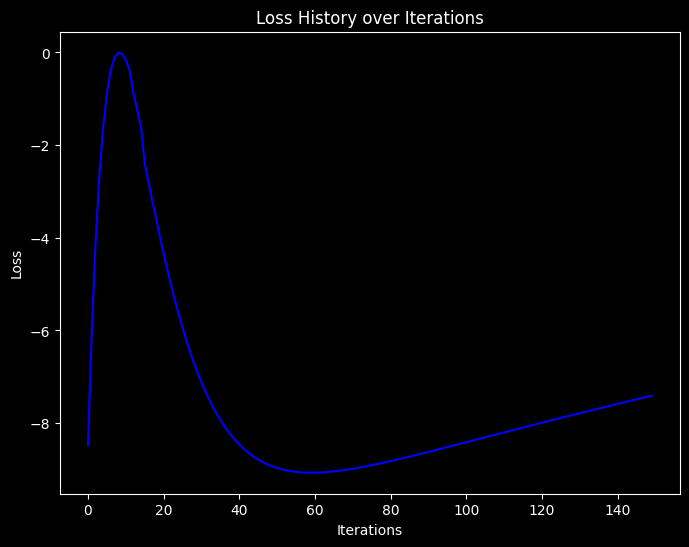

In [27]:
# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(loss_history, color='blue',markerfacecolor='red',
          markersize=10)

# Label the axes
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Add a title
plt.title('Loss History over Iterations')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Model(Blue) and Data(Red)')

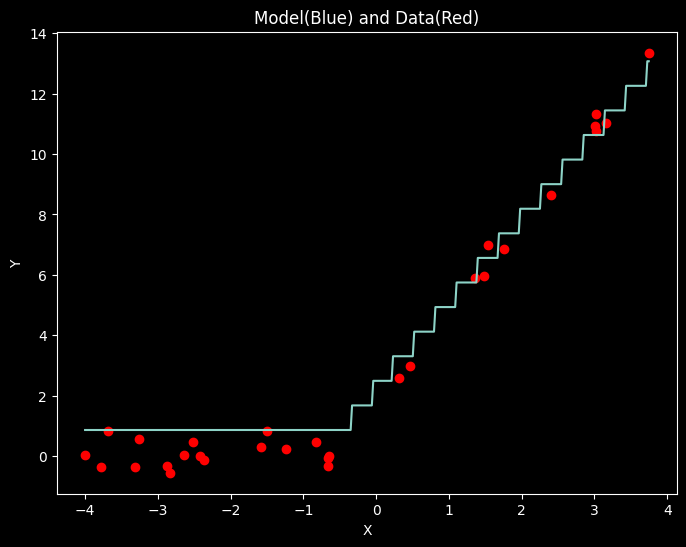

In [28]:
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
# Create a plot
x_values = np.linspace(np.min(X),np.max(X), 400)
y_values = f2(x_values,w0,w1,w2,w3)
plt.plot(x_values, y_values)
# Label the axes
plt.xlabel('X')
plt.ylabel('Y')

# Add a title
plt.title('Model(Blue) and Data(Red)')


2.1 Σχόλια:

Από το διάγραμμα σφάλματος παρατηρούμε ότι το σφάλμα αυξάνεται για τις πρώτες 20 επαναλήψεις, έπειτα μειώνεται και τέλος φαίνεται να αυξάνεται πάλι. Η εικόνα αυτή δείχνει ότι η μέθοδος πέφτει σε τοπικό ελάχιστο και δεν συγκλίνει, το οποίο μας οδηγεί να συμπαιράνουμε οτι ο ρυθμός εκμάθησης 0.001 είναι πιθανώς ακατάλληλος.

Απο διάγραμμα των δεδομένων και της τελικής συνάρτησης παρατηρούμε ότι η συνάρτηση προσεγγίζει τα δεδομένα με αρκετή ακρίβεια αρκετή

Αλλάζοντας τον ρυθμό εκμάθησης σε $10^{-4}$ είναι εμφανές ότι δεν έχει επιτευχθεί σύγκλιση της μεθόδου. Συνεπώς απαιτείται ένας μεγαλύτερος ρυθμός εκμάθησης (μικρότερος του $10^{-3}$).

2.2 Σχόλια:
Σε σχέση με το ερωτημα 2.1, ορατή διαφορά παρατηρούμε στο ερώτημα 2.2.1 καθώς ο μειούμενος ρυθμός μάθησης φαίνεται να αντιστοιχεί σε μείωση του ρυθμού απομάκρυνσης από το τοπικό βέλτιστο. Στην περίπτωση 2.2.2 Δεν παρατηρείται ιδιαίτερη διαφορά με το 2.1 (ανεπαίσθητη μείωση στις 150 επαναλήψεις).

# Part 3 Face Recognition - Eigenfaces

In [29]:
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import imageio.v3 as iio
from math import sqrt
import numpy as np
import math
import glob
import re
import os
from sklearn.metrics import accuracy_score as score
plt.style.use('dark_background')

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')
#images stored at /content/gdrive/MyDrive/Machine_Learning/faces

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. LoadImages & Preprocessing

In [31]:
def loadImages(path, set_number):
  #Create custom range for each set
  im_Set = set()
  if set_number == "Set_1":
    im_range = range(1, 8)
  elif set_number == "Set_2":
    im_range = range(8, 20)
  elif set_number == "Set_3":
    im_range = range(20, 32)
  elif set_number == "Set_4":
    im_range = range(32, 46)
  elif set_number == "Set_5":
    im_range = range(46, 65)
  else:
    print("set_number: {\"Set_1\",\"Set_2\",\"Set_3\",\"Set_4\",\"Set_5\"}")
    return 0 , 0


  #Create Set of image paths based on custon range
  for img_num in im_range:
      im_Set.add(f"person*_{img_num:02d}.png")

  #Traverse folder and extract features, targets for image set
  features = []
  targets = []
  for images in im_Set:
    persons_ims_in_range_set_path = os.path.join(path, images)
    for im_path in glob.glob(persons_ims_in_range_set_path):
      #Transform image to column vector for PCA
      im = iio.imread(im_path)
      im = np.array(im)
      im =  np.reshape(im, (-1, 1))
      features.append(im)
      #Extract target info from file name
      filename = os.path.basename(im_path)
      pattern = re.compile(r'\d+')
      numeric_parts = pattern.findall(filename)
      numeric_info = [int(part) for part in numeric_parts]
      targets.append(numeric_info[0])
  features = np.hstack(features)
  return features, targets


# features, targets = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/","Set_1")
# print(features.shape)
# print(len(targets))
# print(targets)


In [32]:
#Preprocessing of images by subtracting the mean image (centering)
#And dividing by the standard deviation (normalisation)
def preprocessing(images):
  mean_image = np.mean(images, axis=0)
  centered_images = images - mean_image
  std_devs = np.std(centered_images, axis=0)
  normalized_images = centered_images / std_devs
  normalized_images = np.transpose(normalized_images) #For compatibility with sklearn.PCA
  return normalized_images

## 2. Eigenfaces Method

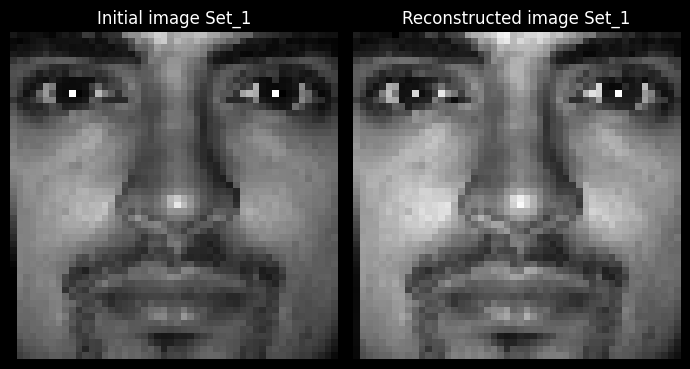

In [33]:
def compute_eigenfaces(images, n_components=30):
    pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
    pca.fit(images)
    eigenfaces = pca.components_
    return pca, eigenfaces

def project_images(images, pca):
    projected_images = pca.transform(images)
    return projected_images

def image_reconstruction(images, pca):
  reconstructed_images = pca.inverse_transform(images)
  return reconstructed_images

def image_group(pca,s):
  images, person_nums = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/",s)
  initial_images = np.transpose(images) #For compatibility with sklearn.PCA
  num_rows = initial_images.shape[0]
  random_index = np.random.choice(num_rows)

  random_row = initial_images[random_index]
  initial_image = np.reshape(random_row,(50,50))

  processed = preprocessing(images)
  random_row = processed[random_index]
  random_row = np.reshape(random_row,(1, -1))
  projected_image = pca.transform(random_row)
  reconstruction = pca.inverse_transform(projected_image)
  processed_image = reconstruction.reshape(50, 50)
  return initial_image, processed_image

images, person_nums = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/","Set_1")
images = preprocessing(images)
pca, eigenfaces = compute_eigenfaces(images,n_components=30)

fig, axes = plt.subplots(1, 2, figsize=(7, 14))
init, proc = image_group(pca,"Set_1")
ax_a = axes[0]
ax_a.imshow(init, cmap='gray')
ax_a.axis('off')
ax_a.set_title('Initial image Set_1')

# Plot data_b[i] in the right column of the i-th row
ax_b = axes[1]
ax_b.imshow(proc, cmap='gray')
ax_b.axis('off')
ax_b.set_title('Reconstructed image Set_1')
plt.tight_layout()

# Show the plot
plt.show()

Σχόλιο:

Κατά την ανακατασκευή της εικόνας παρατηρείται απώλεια πληροφορίας, το οποίο είναι αποτέλεσμα της μεθόδου pca, για τον συγκεκριμένο αριθμο ιδιοδιανυσμάτων.

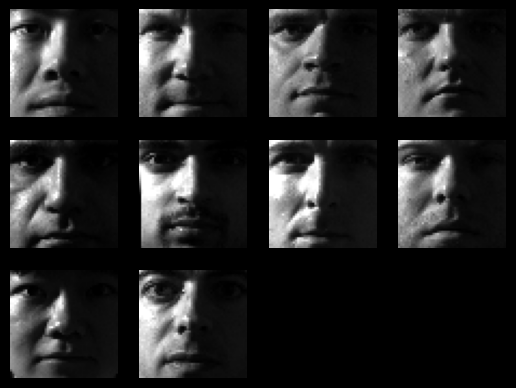

In [34]:
#Function to display images from our sets
def display(images, num, range_imgs):
  num = sqrt(num)
  m = num
  p = 1
  if num != int(num):
    num = int(num)
    m = num + 1
  fig = plt.figure()
  for i in range_imgs:
    fig.add_subplot(int(num), int(m), p)
    image = images[i,:]
    image_matrix = image.reshape(50, 50)
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')
    p += 1
  plt.show()

images, person_nums = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/","Set_5")
normalized_images = preprocessing(images)
display(normalized_images, 10, range(60,70))

## 3. Experimenting with Different Values of d

[58 57 66 23 42 11 46 36 50 65]


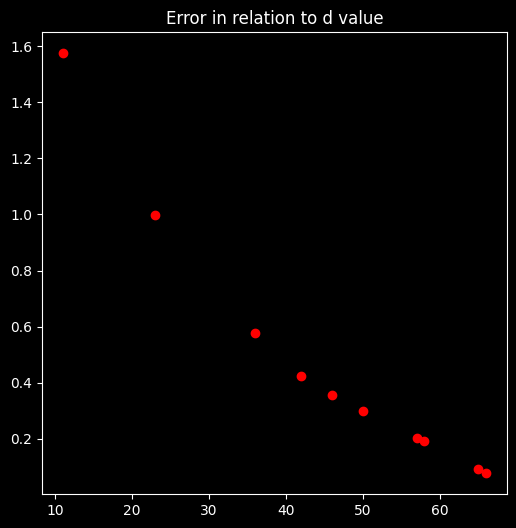

In [35]:
def compute_error(normalized_images, reconstructed_images):
  mean_error = normalized_images - reconstructed_images
  mean_error = np.power(mean_error, 2)
  mean_error = np.sum(mean_error, axis=0)
  mean_error = np.sqrt(mean_error)
  mean_error = np.mean(mean_error, axis=0)
  # print(mean_error)
  return mean_error




images, person_nums = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/","Set_1")
normalized_images = preprocessing(images)
errors = []
ds = []
pca_list = []
projected_images_list = []
random_numbers = np.random.randint(2, 69, size=10) #Cant use range [2,200] due to sklearn library limitations
print(random_numbers)
for i in random_numbers:
  pca, eigenfaces = compute_eigenfaces(normalized_images, n_components=i)
  pca_list.append(pca)
  projected_images = project_images(normalized_images, pca)
  projected_images_list.append(projected_images)
  reconstructed_images = image_reconstruction(projected_images, pca)
  errors.append(compute_error(normalized_images,reconstructed_images))
  ds.append(i)

plt.figure(figsize = (6,6))
plt.scatter(ds, errors, marker='o', color='red')
plt.title("Error in relation to d value")
plt.show()

Σχόλια:
Παρατηρούμε ότι καθώς αυξάνονται τα ιδιοδιανύσματα η απώλεια πληροφορίας μειώνεται για τα ανακατασκευασμένα δεδομένα μας. Προσεγγίζει το 0 καθώς τα ιδιοδιανύσματα τείνουν στον αριθμό των εικόνων στα δεδομένα πράγμα αναμενόμενο.  

## 4. Top 9 Eigenvectors

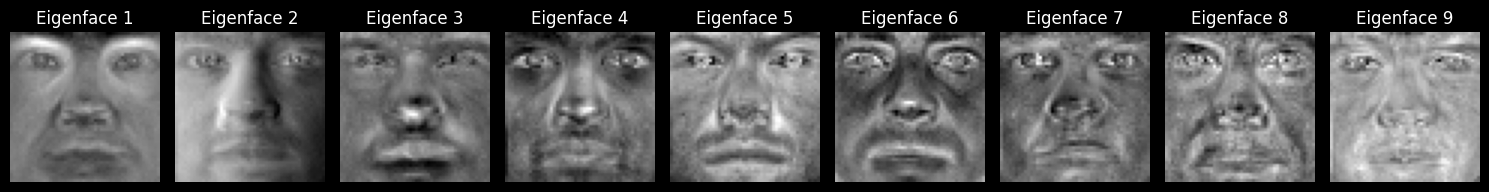

In [36]:
images, person_nums = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/","Set_1")
normalized_images = preprocessing(images)
pca, eigenfaces = compute_eigenfaces(normalized_images, n_components=30)

#In sklearn the components are sorted by decreasing explained_variance, so we dont have to sort them
plt.figure(figsize=(15, 6))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(pca.components_[i].reshape(50,50), cmap='gray')
    plt.title(f'Eigenface {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Σχόλια:

Παρατηρούμε ότι τα 9 ιδιοδιανύσματα εκφράζουν διαφορετικά είδη πληροφορίας για τις εικόνες του Set_1. Για παράδειγμα τα ιδιοδιανύσματα 1 εώς 5 φαίνεται να κωδικοποιούν διαφορετικές γωνίες φωτισμού για τη μύτη. Τα υπολοιπα ιδιοδιανύσματα εστιάζουν σε αλλα χαρακτηριστικά του προσώπου. Για παραδειγμα το ιδιοδιάνυσμα 6 εκφράζει τα ζυγωματικά του πρωσόπου.

Θα μπορούσαμε να πούμε ότι τα 9 κυριότερα ιδιοδιανύσματα εκφράζουν τις 9 κατευθύνσεις στον πολυδιάστατο χώρο των εικόνων μας που αντιστοιχούν στις μεγαλύτερες τιμές διακύμανσης των δεδομένων μας

##5. Classification Efficiency in Relation to d




In [37]:
#KNN Classifier

def euclideanDistance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

def findKNearest(test, samples, k):
    samplesColumnsNum = samples.shape[1]
    kNearestList = []

    for idx, aRow in enumerate(samples):
        distance = euclideanDistance(test, aRow)
        if len(kNearestList) < k:
            newRow = np.append(aRow, [distance, idx])
            kNearestList.append(newRow)
        else:
            for aItem in kNearestList:
                if aItem[samplesColumnsNum] > distance:
                    newRow = np.append(aRow, [distance, idx])
                    kNearestList.append(newRow)
                    kNearestList.sort(key=lambda x: x[samplesColumnsNum])
                    kNearestList = kNearestList[:k]
                    break

    return kNearestList

#Helper Function to determine the person id of a picture
def most_common_item(lst):
  counter = Counter(lst)
  most_common = counter.most_common(1)  # Get the most common item
  return most_common[0][0]  # Return the item itself

#Pass the projected images and test_images transformed by pca
#Returns the person id predicted by eigenfaces method
def classify(projected_images,test_images,person_nums,k=10):
  prediction = []
  for vector in test_images:
    possible_people = []
    kNearestList = findKNearest(vector.flatten(), projected_images, k)
    for aNN in kNearestList:
      possible_people.append(person_nums[int(aNN[-1])])
    person_id = most_common_item(possible_people)
    prediction.append(person_id)
  return prediction



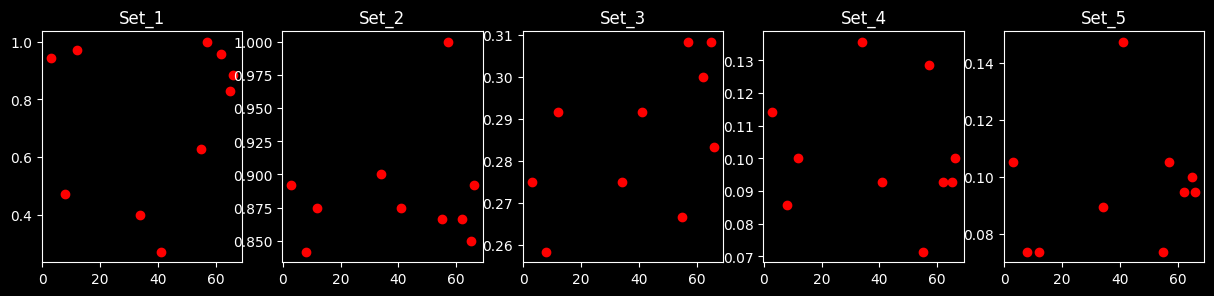

The d corresponding to the maximum score for Set_1: 57
The d corresponding to the maximum score for Set_2: 57
The d corresponding to the maximum score for Set_3: 57
The d corresponding to the maximum score for Set_4: 34
The d corresponding to the maximum score for Set_5: 41
Worst accuracy across all sets: 3


In [38]:
Sets = ["Set_1","Set_2","Set_3","Set_4","Set_5"]
#Random numbers produced in part 3.3 provided here for reproductible results
ds = [ 8,55, 41,  3, 62, 57 ,66, 12, 65 ,34]
pca_list = []
for i in random_numbers:
  pca, eigenfaces = compute_eigenfaces(normalized_images, n_components=i)
  pca_list.append(pca)
#Pick pca object corresponding to d=8
pca = pca_list[ds.index(8)]


scores = []
fig = plt.figure(figsize = (15,3))
p = 1
for s in Sets:
  images, person_nums = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/",s)

  normalized_images = preprocessing(images)
  set_scores=[]
  fig.add_subplot(1, 5, p).set_title(s)
  for i, pca in enumerate(pca_list):
    test_images = project_images(normalized_images, pca)
    pred = classify(projected_images_list[i],test_images,person_nums,10)
    set_scores.append(score(person_nums, pred))
  scores.append(set_scores)
  plt.scatter(ds, scores[p-1], marker='o', color='red')
  p = p+1

plt.show()

from itertools import zip_longest
for i , s in enumerate(Sets):
  d_scores = dict(zip_longest(ds,scores[i], fillvalue=None))
  max_score_d = max(d_scores, key=d_scores.get)
  print(f"The d corresponding to the maximum score for {s}: {max_score_d}")
print(f"Worst accuracy across all sets: {min(ds)}")

num of components =  (30,)
[0.22676015 0.14278651 0.10235742 0.08991272 0.08357854 0.06962966
 0.05080744 0.0381177  0.03447746 0.03211499]


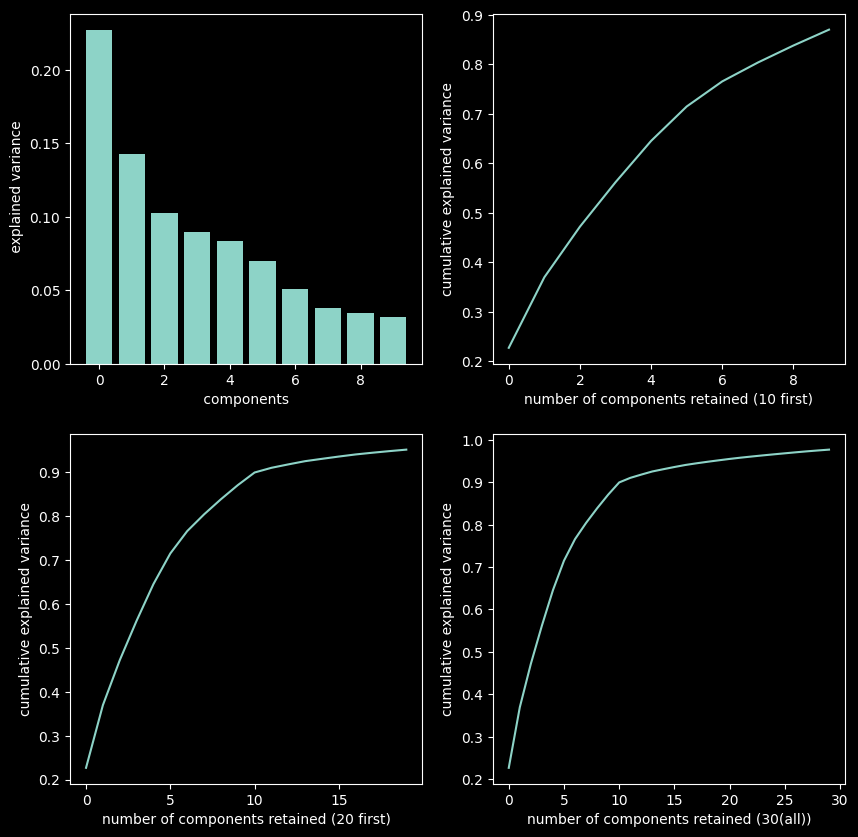

In [39]:
#These graphs are besed on lab07 and have been modified for the purposes of this assignment

images, person_nums = loadImages("/content/gdrive/MyDrive/Machine_Learning/faces/","Set_1")
normalized_images = preprocessing(images)
pca, eigenfaces = compute_eigenfaces(normalized_images, n_components=30)


print("num of components = ",pca.explained_variance_ratio_.shape)

print (pca.explained_variance_ratio_[:10])

cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 10))
numOfComp=10
plt.subplot(2, 2, 1)
plt.bar(range(numOfComp),pca.explained_variance_ratio_[:numOfComp])
plt.xlabel(' components ')
plt.ylabel(' explained variance');


plt.subplot(2, 2, 2)
plt.plot(cumExplainedVar[:10])
plt.xlabel('number of components retained (10 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 3)
plt.plot(cumExplainedVar[:20])
plt.xlabel('number of components retained (20 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 4)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (30(all))')
plt.ylabel('cumulative explained variance');

plt.show()



Σχόλια:


a. Η μέγιστη απόδοση στο Set_2 επιτυγχάνεται για 12 ιδιοδιανύσματα. Η απόδοση ταξινόμησης των προσώπων μειώνεται σημαντικά καθώς αυξάνεται ο αριθμός του set. Αυτό συμβαίνει γιατί τα set είναι ταξινομημένα κατά μειούμενη ένταση φωτός στις φωτογραφίες, με αποτέλεσμα οι συνθήκες φωτισμού να διαφέρουν όλο και περισσότερο από αυτές του set 1 (το οποίο χρησιμοποιήσαμε για να εκπαιδεύσουμε το μοντέλο μας) καθώς ο αριθμός του set αυξάνεται. Έτσι το Set_5 παρουσιάζει, αναμενόμενα, την χειρότερη απόδοση ταξινόμησης για όλα τα d.

b. To 3 παράγει τη σταθερότερη και παραλληλα χειρότερη απόδοση για όλα τα set. Αυτό είναι αναμενόμενο καθώς προκύπτει ότι 3 ιδιοδιανύσματα δεν είναι αρκετά για να περιγράψουν τα δεδομένα μας.

c. Στα διαγράμματα σωρευτικού λόγου της εξηγούμενης διακύμανσης σε σχέση με τον αριθμό των κυρίων συνιστωσών (τροποποιημένο από το lab07) παρατηροούμε ότι οι 12 περίπου πρώτες συνιστώσες κωδικοποιούν το 90% της διακύμανσης των δεδομένων. Επιπλέον, το d=12 παράγει την καλύτερη απόδοση στα set_2 και set_3, δηλαδή είναι αυτό που βελτιστοποιεί την ικανότητα γενίκευσης του μοντέλου (δεν θεωρώ ότι τα αποτελέσματα για τα set_4 και set_5 παρέχουν πληροφορία που μπορούμε να αξιοποιήσουμε, καθώς οι συνθήκες φωτισμού σε αυτά διαφέρουν πολύ απο το set εκπαίδευσης).Συνεπώς, για το μοντέλο θα επέλεγα το d = 12.

## 6. Image Reconstruction

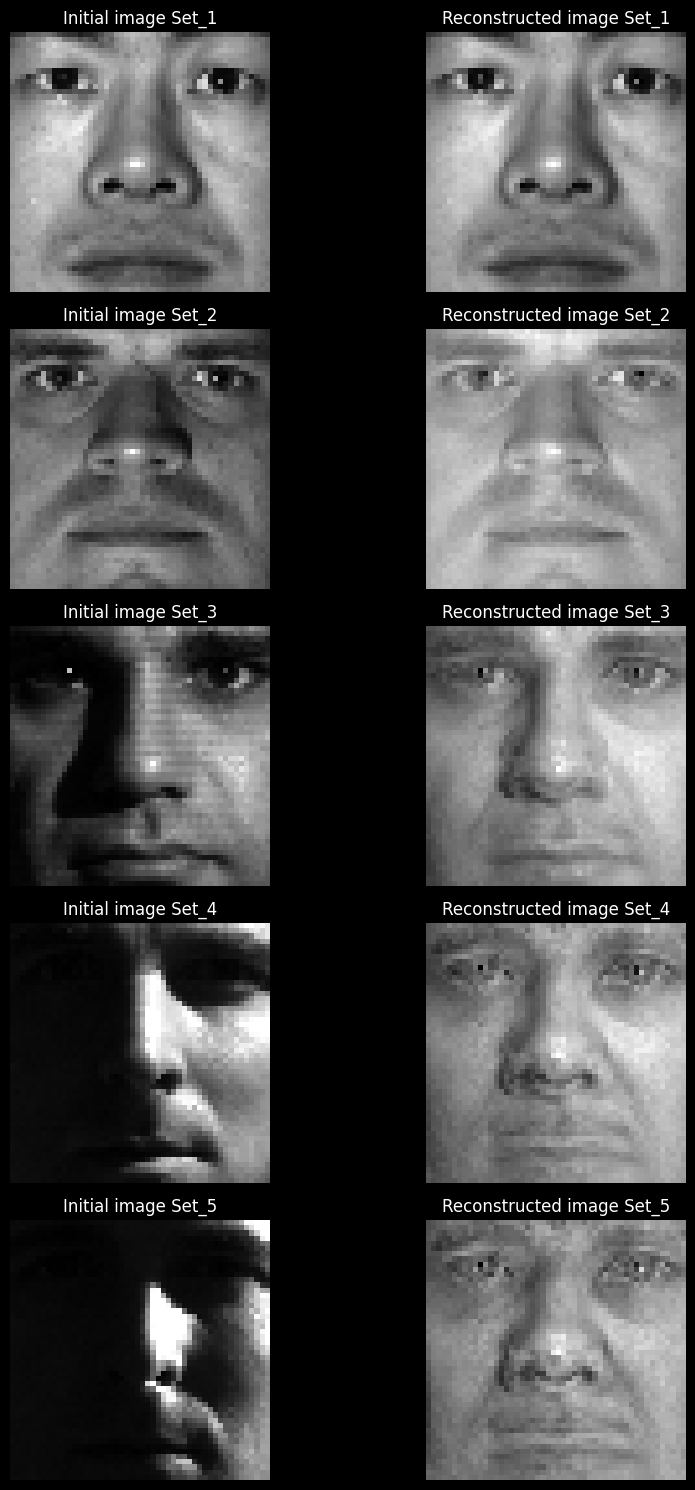

In [40]:
Sets = ["Set_1","Set_2","Set_3","Set_4","Set_5"]
#Random numbers produced in part 3.3 provided here for reproductible results
ds = [ 8,55, 41,  3, 62, 57 ,66, 12, 65 ,34]
pca_list = []
for i in random_numbers:
  pca, eigenfaces = compute_eigenfaces(normalized_images, n_components=i)
  pca_list.append(pca)
#Pick pca object corresponding to d=8
pca = pca_list[ds.index(12)]


fig, axes = plt.subplots(5, 2, figsize=(10, 15))

for i, s in enumerate(Sets):
    # Plot data_a[i] in the left column of the i-th row
    init, proc = image_group(pca,s)
    ax_a = axes[i, 0]
    ax_a.imshow(init, cmap='gray')
    ax_a.axis('off')
    ax_a.set_title(f'Initial image {s}')

    # Plot data_b[i] in the right column of the i-th row
    ax_b = axes[i, 1]
    ax_b.imshow(proc, cmap='gray')
    ax_b.axis('off')
    ax_b.set_title(f'Reconstructed image {s}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Σχόλια:

Όπως ήταν αναμενόμενο η ποιότητα ανακατασκευής κάθε εικόνας μειώνεται καθώς αυξάνεται ο αριθμός του set. Αυτό συμβαίνει γιατί τα set είναι ταξινομημένα κατά μειούμενο φωτισμό, ενώ χρησιμοποίησαμε ως set εκπαίδευσης το set με τις 'φωτινότερες' εικόνες. Ως αποτέλεσμα έχουμε χειρότερη ποιότητα ανακατασκευής στις πιο 'σκοτεινές' εικόνες, καθώς το μοντέλο δεν μπορεί να αποκωδικοποιήσει πιστά την πληροφορία σε αυτές. Συγκεκριμένα αφαιρεί πλήρως τις πιο σκούρες σκιές, πράγμα αναμενόμενο αφού τα ιδιοδιανύσματα του μοντέλου μας κωδικοποιούν αποκλειστικά φωτεινές τιμές.

## 7. Top 9 Singular Vectors after applying SVD on Set_1

δεν πρόλαβα να το υλοποιήσω αυτό